In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
price = pd.read_csv("CarPrice_Assignment.csv").set_index("car_ID")

pd.set_option('display.max_columns', 500) #to display all the columns
price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Exploratory Data Analysis of the dataset.

In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

As all the columns have 205 values, there are no null values present.

In [4]:
price.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
price.shape

(205, 25)

In [6]:
#Creating a list to check if these columns contain any invalid values.
li = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber',
     'fuelsystem']
for i in li:
    print(price[i].value_counts(),'\n\n')

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64 


gas       185
diesel     20
Name: fueltype, dtype: int64 


std      168
turbo     37
Name: aspiration, dtype: int64 


four    115
two      90
Name: doornumber, dtype: int64 


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 


fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 


front    202
rear       3
Name: enginelocation, dtype: int64 


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64 


mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64 




No invalid values found in any of the variable.

In [7]:
#Seperating the company name from the CarName column.
price['CompanyName'] = price['CarName'].str.split(' ').str[0]
price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
price['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
maxda           2
porcshce        1
mercury         1
toyouta         1
Nissan          1
vokswagen       1
Name: CompanyName, dtype: int64

As we can see there are a few invalid/mispelt names in the CompanyName column. So, we will replace them with proper names

In [9]:
price['CompanyName'].replace({'maxda':'mazda','vw':'volkswagen','porcshce':'porsche','Nissan':'nissan','vokswagen':'volkswagen',
                             'toyouta':'toyota','alfa-romero':'alfa-romeo'}, inplace=True)
price['CompanyName'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
volvo         11
peugeot       11
dodge          9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
alfa-romeo     3
chevrolet      3
jaguar         3
renault        2
mercury        1
Name: CompanyName, dtype: int64

Conduction Bivariate Analysis on the dataset.

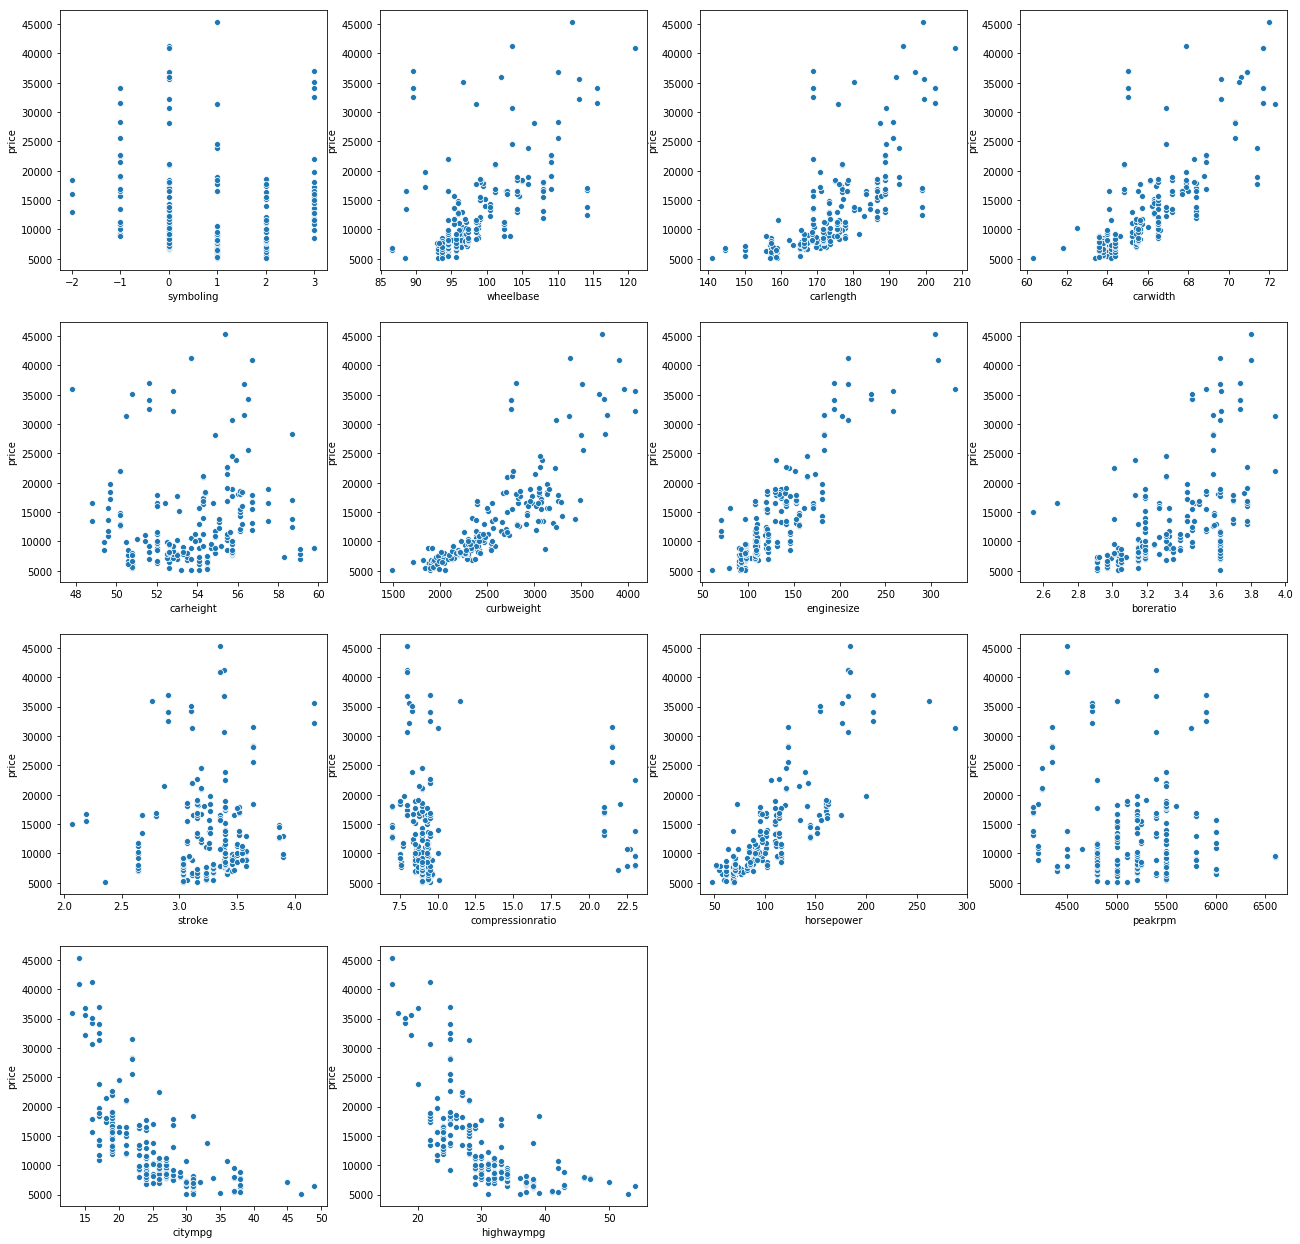

In [10]:
#Creating a list,li which will contain all the numerical columns present in the dataset.
li = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize',
      'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

#plotting scatterplot of the all the numerical columns wrt 'price' column.
plt.figure(figsize=(22, 22))
for i in range(len(li)):
    plt.subplot(4,4,i+1)
    sns.scatterplot(x=li[i], y='price', data=price)
plt.show()

We can see that
- wheelbase, curbweight, enginesize, horsepower, citympg and highwaympg are somewhat linearly correlated with price.

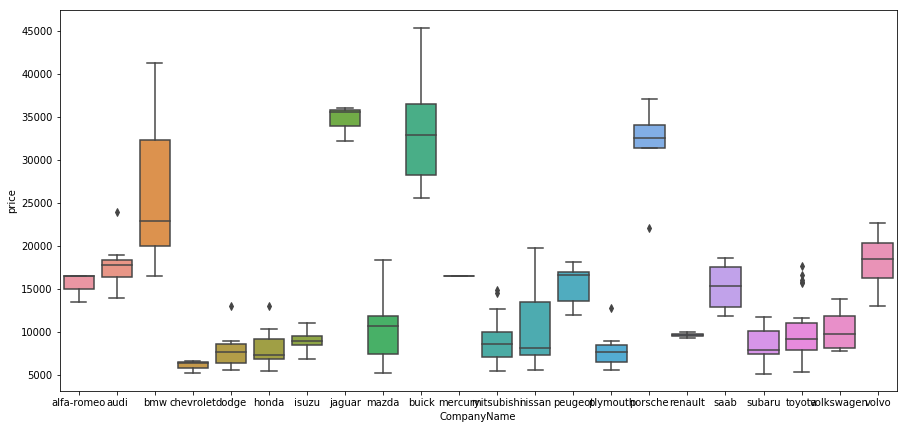

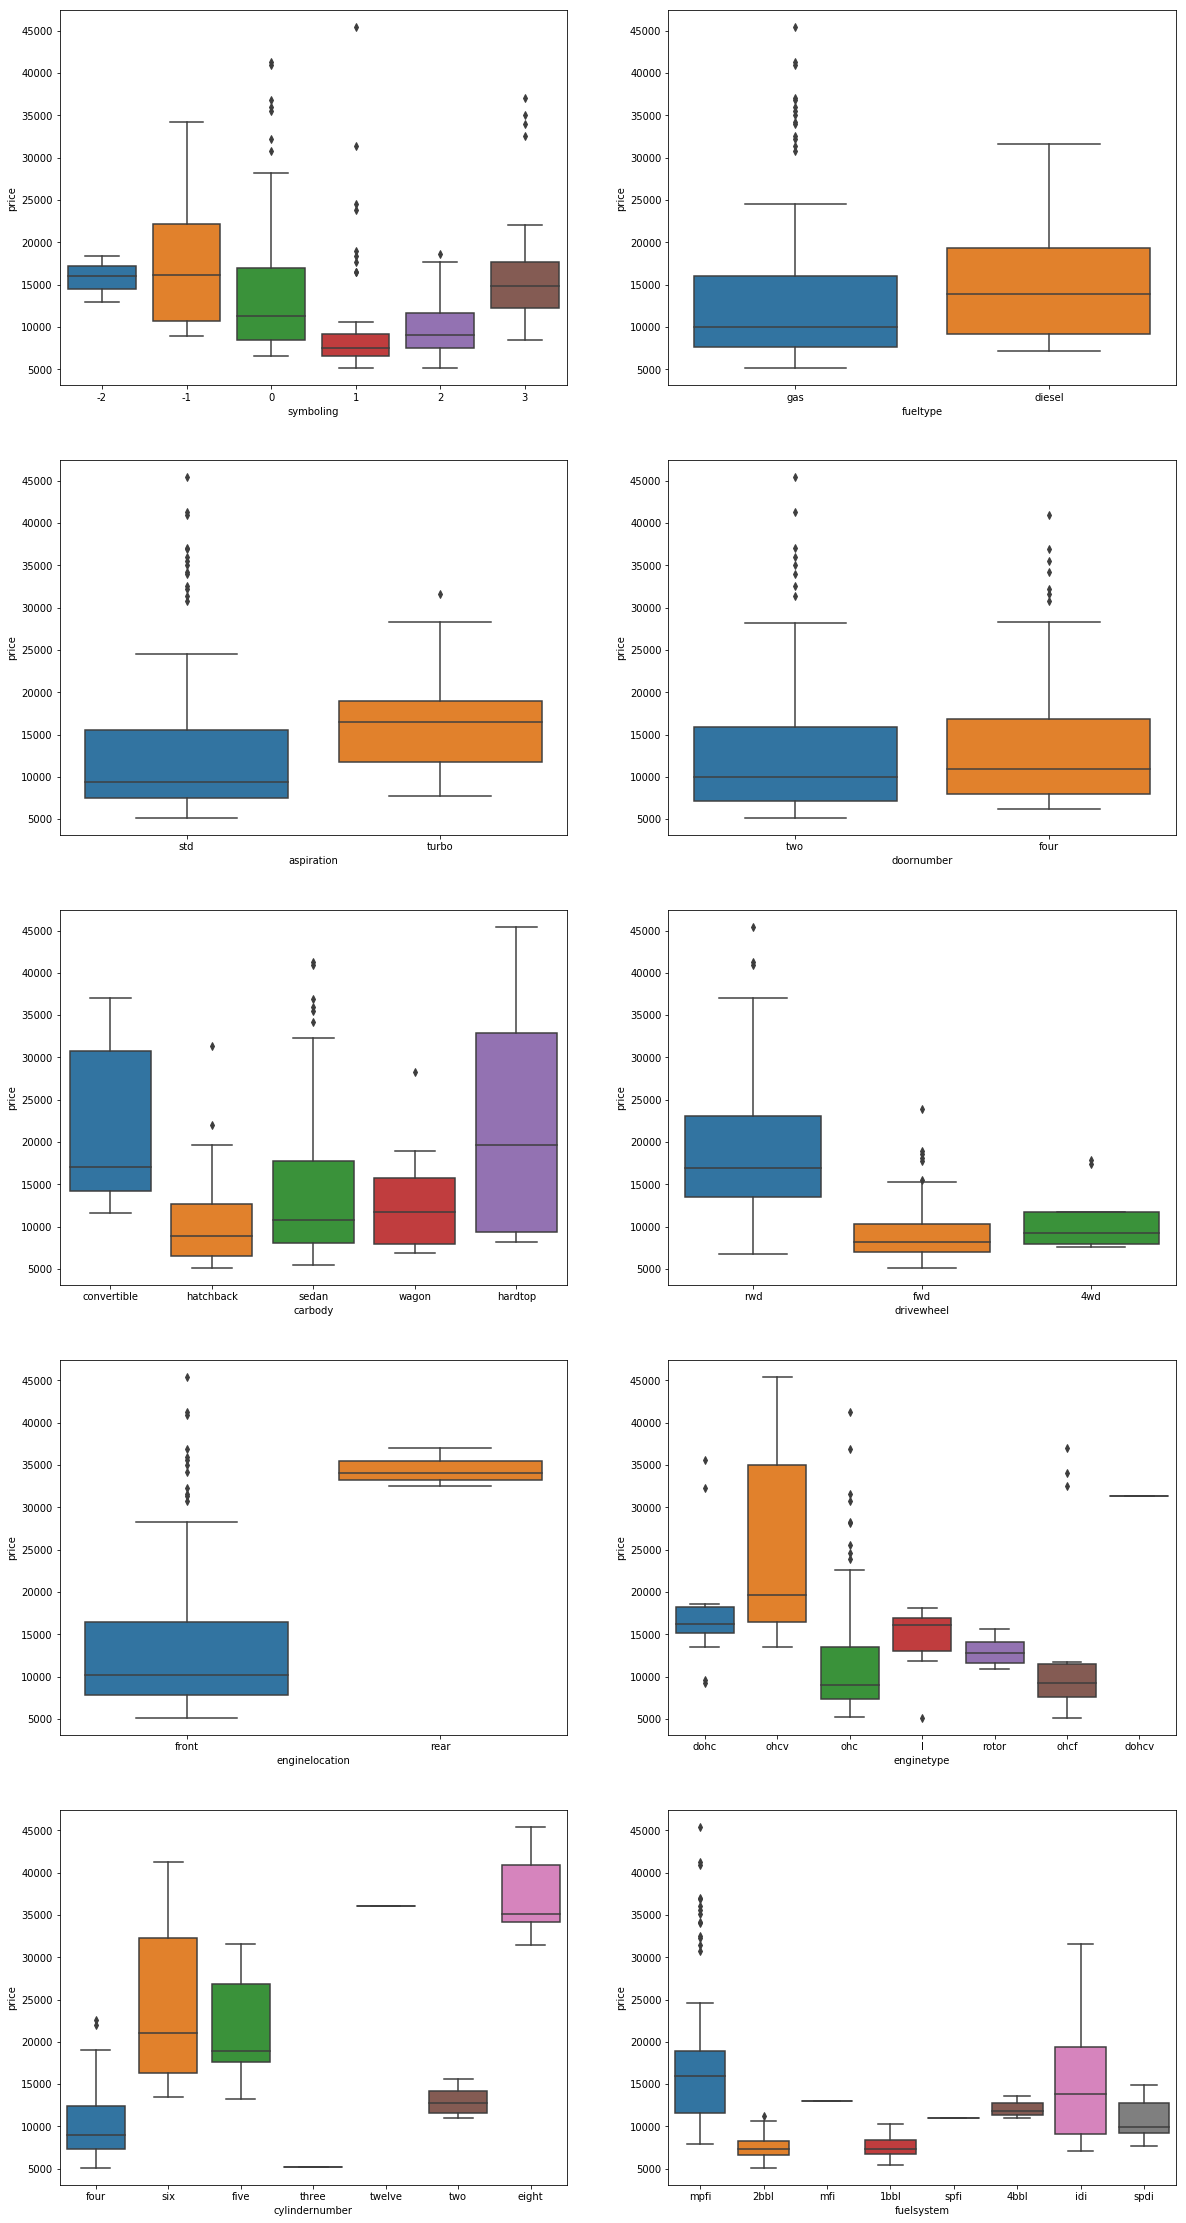

In [11]:
#As 'CompanyName' has many categories, we will plot the box plot seperately for this.
plt.figure(figsize=(15,7))
sns.boxplot(x='CompanyName',y='price', data=price)

#Creating a list of remaining categorical variables
li = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
      'cylindernumber','fuelsystem']
#plotting a box plot for each of the categorical variable name present in the above list.
plt.figure(figsize=(20,40))
for i in range(len(li)):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=li[i],y='price',data=price)
plt.show()

- Here we can see that enginelocation has very clear relation with the price.

Now we will assign values to the categorical variables as linear regression needs numerical variables to identify linear relation between different features.

We will first start with fueltype, aspiration, doornumber, enginelocation as they have only 2 unique values.

In [12]:
price[['fueltype']] = price[['fueltype']].apply(lambda x: x.map({'gas':0,'diesel':1}))
price[['aspiration']] = price[['aspiration']].apply(lambda x: x.map({'std':0,'turbo':1}))
price[['doornumber']] = price[['doornumber']].apply(lambda x: x.map({'two':0,'four':1}))
price[['enginelocation']] = price[['enginelocation']].apply(lambda x: x.map({'front':0,'rear':1}))

In [13]:
price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
2,3,alfa-romero stelvio,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
3,1,alfa-romero Quadrifoglio,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
4,2,audi 100 ls,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,audi 100ls,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Now we will create (n-1) dummy variables for each variable which has n categories where n>2. They are symboling, carbody, drivewheel, enginetype, fuelsystem, cylindernumber.
- We will also be dropping CompanyName column because, as we are modelling this data for our customer, Geely, we want to understand what features and variables are responsible for the pricing of a particular car.
- I don't think taking into consideration which brand puts what price on their car will help our company Geely with anything. We need to understand what the presently operating companies in the US are charging the US customers and what features they provide them.

In [14]:
symboling = pd.get_dummies(price.symboling, prefix='symboling', drop_first=True)

carbody = pd.get_dummies(price.carbody, drop_first=True)

drivewheel = pd.get_dummies(price.drivewheel, drop_first=True)

enginetype = pd.get_dummies(price.enginetype, prefix='enginetype', drop_first=True)

fuelsystem = pd.get_dummies(price.fuelsystem, prefix='fuelsystem', drop_first=True)

cylindernumber = pd.get_dummies(price.cylindernumber, prefix='#ofCylinder', drop_first=True)

#Now that we have created dummy variables for the above mentioned varibles, we need to drop those variables.
li = [symboling,carbody,drivewheel,enginetype,fuelsystem,cylindernumber]
for i in li:
    price = pd.concat([price,i],axis=1)
price.drop(columns=['CarName','symboling','CompanyName','carbody','drivewheel','enginetype','fuelsystem','cylindernumber'], inplace=True)
price.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,hardtop,hatchback,sedan,wagon,fwd,rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,#ofCylinder_five,#ofCylinder_four,#ofCylinder_six,#ofCylinder_three,#ofCylinder_twelve,#ofCylinder_two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


# Splitting data into training and test set.

In [15]:
#importing the train_test_split library from sklearn.
from sklearn.model_selection import train_test_split

#creating a train and test set with 70:30 split.
df_train, df_test = train_test_split(price, train_size=0.7, test_size=0.3, random_state=100)

In [16]:
df_train.shape

(143, 48)

In [17]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,hardtop,hatchback,sedan,wagon,fwd,rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,#ofCylinder_five,#ofCylinder_four,#ofCylinder_six,#ofCylinder_three,#ofCylinder_twelve,#ofCylinder_two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.090909,0.181818,0.559441,0.006993,98.523077,173.416783,65.839860,53.551748,2539.510490,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,13056.347322,0.090909,0.349650,0.300699,0.118881,0.125874,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.288490,0.387050,0.498199,0.083624,5.961835,12.598122,2.214203,2.433766,544.650539,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,7807.036883,0.288490,0.478536,0.460174,0.324786,0.332873,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7554.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,25.000000,31.000000,10198.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,141.000000,3.540000,3.400000,9.400000,116.000000,5500.000000,31.000000,36.500000,16465.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000,1.000000,1.000000,1.000000,1

As all the features/variables in our test set are not in the same scale, we need to convert them into same scale.

In [18]:
#importing the MinMaxScaler to scale the values of the dataset.
from sklearn.preprocessing import MinMaxScaler
#creating an object of the class MinMaxScaler()
scaler = MinMaxScaler()

In [19]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,hardtop,hatchback,sedan,wagon,fwd,rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,#ofCylinder_five,#ofCylinder_four,#ofCylinder_six,#ofCylinder_three,#ofCylinder_twelve,#ofCylinder_two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,0,0,1,0,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
126,0,0,0,0,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,5500,19,27,22018.0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
167,0,0,0,0,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,6600,26,29,9538.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
200,0,1,1,0,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [20]:
#creating a list which will contain all the variables which are out of scale.
li = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
     'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#performing fit_transform() on the columns present in the above list.
df_train[li] = scaler.fit_transform(df_train[li])
df_train.head()

C:\Users\shara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\shara\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shara\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,hardtop,hatchback,sedan,wagon,fwd,rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,#ofCylinder_five,#ofCylinder_four,#ofCylinder_six,#ofCylinder_three,#ofCylinder_twelve,#ofCylinder_two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
123,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
126,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
167,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
200,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


All the variables are in scale now.

In [21]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,hardtop,hatchback,sedan,wagon,fwd,rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,#ofCylinder_five,#ofCylinder_four,#ofCylinder_six,#ofCylinder_three,#ofCylinder_twelve,#ofCylinder_two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.090909,0.349650,0.300699,0.118881,0.125874,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.288490,0.478536,0.460174,0.324786,0.332873,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

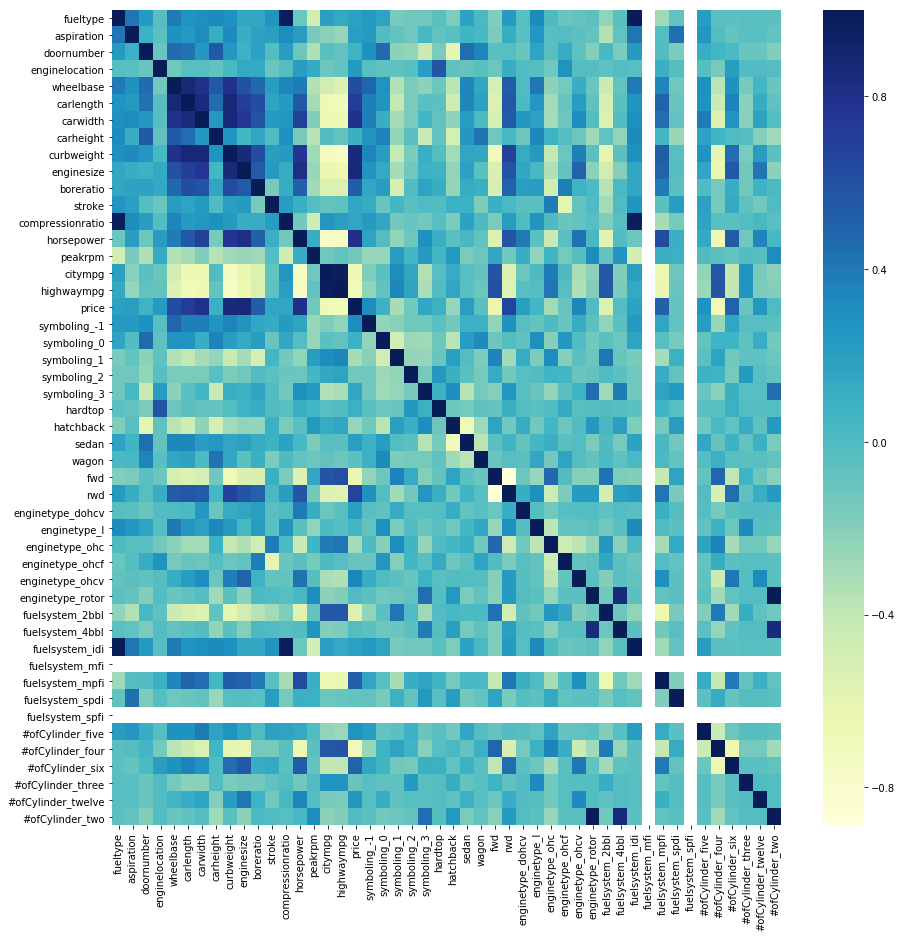

In [22]:
#plotting a heatmap for all the variables to visualize the correlation of all the variables wrt the feature 'price'.
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),cmap='YlGnBu')

In [23]:
#to get a numerical idea on the correlation of variables wrt to the 'price' variable, we will select on the price row from the
#correlation matrix.
cor = df_train.corr().iloc[[17]]
cor

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,hardtop,hatchback,sedan,wagon,fwd,rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,#ofCylinder_five,#ofCylinder_four,#ofCylinder_six,#ofCylinder_three,#ofCylinder_twelve,#ofCylinder_two
price,0.19115,0.20654,0.075936,0.226217,0.622591,0.713749,0.79938,0.096631,0.86186,0.867915,0.533591,0.15282,0.160847,0.806183,-0.127431,-0.67429,-0.688389,1.0,0.30941,0.078969,-0.31129,-0.127138,0.165084,0.089735,-0.252484,0.205018,-0.051173,-0.635202,0.677169,0.197875,0.044246,-0.297108,-0.089985,0.339468,-0.000793,-0.537919,-0.017148,0.19115,NaN,0.519993,-0.07324,NaN,0.27143,-0.695256,0.500613,-0.085274,0.247489,-0.000793


# Creating our Linear Regression Model.

- We will select the top 15 features using RFE (Recursive Feature Elimination) and then we will remove the unncessary features among these 15 later.

Creating the X_train and y_train dataframe as the input to the model

In [24]:
y_train = df_train.pop('price')
X_train = df_train

In [25]:
#importing the RFE and LinearRegression library from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
#creating an object of class LinearRegression.
lm = LinearRegression()
#fitting our training data X_train and y_train in the LinearRegression object.
lm.fit(X_train, y_train)

#Selecting the top 15 features from our LinearRegression model
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [27]:
#listing the ranking all the features got in the RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 2),
 ('aspiration', False, 19),
 ('doornumber', False, 30),
 ('enginelocation', True, 1),
 ('wheelbase', False, 14),
 ('carlength', False, 22),
 ('carwidth', True, 1),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 24),
 ('highwaympg', False, 17),
 ('symboling_-1', False, 11),
 ('symboling_0', False, 10),
 ('symboling_1', False, 9),
 ('symboling_2', False, 8),
 ('symboling_3', False, 12),
 ('hardtop', False, 5),
 ('hatchback', False, 4),
 ('sedan', False, 7),
 ('wagon', False, 6),
 ('fwd', False, 25),
 ('rwd', False, 20),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 28),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 16),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 31),
 ('fuelsystem_4bbl', False, 23),
 ('fuelsystem_i

In [28]:
#listing only the top 15 features selected in the RFE
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'enginetype_rotor', '#ofCylinder_three',
       '#ofCylinder_twelve', '#ofCylinder_two'],
      dtype='object')

Now that we have the top 15 columns/features, lets use statsmodels api so that we can look the summary of each linear regression model.

In [29]:
#importing the statsmodels library
import statsmodels.api as sm

In [30]:
#Creating X_train_rfe which will contain only the top 15 selected columns from the X_train dataset.
X_train_rfe = X_train[col]

#Adding constant to the X_train_rfe dataframe.
X_train_rfe = sm.add_constant(X_train_rfe)

#Applying the linearRegression model on the X_train_rfe and fitting the training dataset.
lr_1 = sm.OLS(y_train, X_train_rfe).fit()
lr_1.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     106.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.61e-63
Time:                        23:12:11   Log-Likelihood:                 198.28
No. Observations:                 143   AIC:                            -366.6
Df Residuals:                     128   BIC:                            -322.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1223      0.036     -3.396      0.001      -0.193      -0.051
enginelocation         0.2620      0.073      3.578      0.000       0.117       0.407
carwidth               0.2559      0.066      3.872      0.000       0.125       0.387
curbweight             0.2525      0.083      3.054      0.003       0.089       0.416
enginesize             1.2262      0.126      9.736      0.000       0.977       1.475
boreratio             -0.1640      0.042     -3.876      0.000      -0.248      -0.080
stroke                -0.4043      0.050     -8.062      0.000      -0.504      -0.305
horsepower             0.0961      0.091      1.052      0.295      -0.085       0.277
peakrpm                0.0536      0.039      1.358      0.177      -0.024       0.132
enginetype_dohcv      -0.0280      0.083     -0.338      0.736      -0.192       0.136
enginetype_ohc         0.1133      0.018      6.301      0.000       0.078       0.149
enginetype_ohcv       -0.1246      0.031     -3.971      0.000      -0.187      -0.063
enginetype_rotor       0.1593      0.021      7.509      0.000       0.117       0.201
#ofCylinder_three      0.3038      0.068      4.454      0.000       0.169       0.439
#ofCylinder_twelve    -0.4631      0.085     -5.473      0.000      -0.631      -0.296
#ofCylinder_two        0.1593      0.021      7.509      0.000       0.117       0.201
==============================================================================
Omnibus:                       17.072   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.328
Skew:                           0.437   Prob(JB):                     1.75e-09
Kurtosis:                       5.450   Cond. No.                     3.38e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R_squared and Adj.R_squared values are good but we have few features which p values greater than 5%. Those are enginetype_dohcv, horsepower and peakrpm. Therefore lets remove enginetype_dohcv first.

In [31]:
X_train_new = X_train_rfe.drop(columns=['enginetype_dohcv'])

Creating a new LinearRegression model lr_2 with enginetype_dohcv feature absent from it

In [32]:
X_train_lm = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.52e-64
Time:                        23:12:11   Log-Likelihood:                 198.21
No. Observations:                 143   AIC:                            -368.4
Df Residuals:                     129   BIC:                            -326.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1227      0.036     -3.421      0.001      -0.194      -0.052
enginelocation         0.2666      0.072      3.720      0.000       0.125       0.408
carwidth               0.2497      0.063      3.948      0.000       0.125       0.375
curbweight             0.2623      0.077      3.397      0.001       0.110       0.415
enginesize             1.2297      0.125      9.830      0.000       0.982       1.477
boreratio             -0.1639      0.042     -3.888      0.000      -0.247      -0.080
stroke                -0.4032      0.050     -8.084      0.000      -0.502      -0.305
horsepower             0.0806      0.079      1.025      0.307      -0.075       0.236
peakrpm                0.0558      0.039      1.439      0.153      -0.021       0.133
enginetype_ohc         0.1135      0.018      6.338      0.000       0.078       0.149
enginetype_ohcv       -0.1227      0.031     -3.988      0.000      -0.184      -0.062
enginetype_rotor       0.1600      0.021      7.598      0.000       0.118       0.202
#ofCylinder_three      0.3029      0.068      4.459      0.000       0.169       0.437
#ofCylinder_twelve    -0.4592      0.084     -5.496      0.000      -0.625      -0.294
#ofCylinder_two        0.1600      0.021      7.598      0.000       0.118       0.202
==============================================================================
Omnibus:                       17.909   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.213
Skew:                           0.468   Prob(JB):                     6.82e-10
Kurtosis:                       5.492   Cond. No.                     2.59e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.8e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As horsepower still has high p_value, we will remove it and create and new LR model lr_3

In [33]:
X_train_new = X_train_new.drop(columns=['horsepower'])

X_train_lm = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.70e-65
Time:                        23:12:12   Log-Likelihood:                 197.63
No. Observations:                 143   AIC:                            -369.3
Df Residuals:                     130   BIC:                            -330.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1319      0.035     -3.799      0.000      -0.201      -0.063
enginelocation         0.2735      0.071      3.833      0.000       0.132       0.415
carwidth               0.2528      0.063      4.002      0.000       0.128       0.378
curbweight             0.2706      0.077      3.523      0.001       0.119       0.423
enginesize             1.2949      0.108     12.021      0.000       1.082       1.508
boreratio             -0.1605      0.042     -3.818      0.000      -0.244      -0.077
stroke                -0.4086      0.050     -8.234      0.000      -0.507      -0.310
peakrpm                0.0792      0.031      2.522      0.013       0.017       0.141
enginetype_ohc         0.1116      0.018      6.263      0.000       0.076       0.147
enginetype_ohcv       -0.1241      0.031     -4.039      0.000      -0.185      -0.063
enginetype_rotor       0.1631      0.021      7.821      0.000       0.122       0.204
#ofCylinder_three      0.3047      0.068      4.486      0.000       0.170       0.439
#ofCylinder_twelve    -0.4615      0.084     -5.524      0.000      -0.627      -0.296
#ofCylinder_two        0.1631      0.021      7.821      0.000       0.122       0.204
==============================================================================
Omnibus:                       18.727   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.627
Skew:                           0.492   Prob(JB):                     2.04e-10
Kurtosis:                       5.554   Cond. No.                     6.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

All the features now has acceptable p values. So lets check VIF values.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_new.drop(columns=['const'])

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\shara\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
9,enginetype_rotor,inf
12,#ofCylinder_two,inf
2,curbweight,43.21
1,carwidth,34.65
3,enginesize,30.74
5,stroke,20.69
4,boreratio,10.61
7,enginetype_ohc,6.98
6,peakrpm,5.32
8,enginetype_ohcv,1.90


enginetype_rotor has very high VIF. Therefore removing it and creating a new LR model lr_4

In [35]:
X_train_new = X_train_new.drop(columns=['enginetype_rotor'])

X_train_lm = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.70e-65
Time:                        23:12:12   Log-Likelihood:                 197.63
No. Observations:                 143   AIC:                            -369.3
Df Residuals:                     130   BIC:                            -330.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1319      0.035     -3.799      0.000      -0.201      -0.063
enginelocation         0.2735      0.071      3.833      0.000       0.132       0.415
carwidth               0.2528      0.063      4.002      0.000       0.128       0.378
curbweight             0.2706      0.077      3.523      0.001       0.119       0.423
enginesize             1.2949      0.108     12.021      0.000       1.082       1.508
boreratio             -0.1605      0.042     -3.818      0.000      -0.244      -0.077
stroke                -0.4086      0.050     -8.234      0.000      -0.507      -0.310
peakrpm                0.0792      0.031      2.522      0.013       0.017       0.141
enginetype_ohc         0.1116      0.018      6.263      0.000       0.076       0.147
enginetype_ohcv       -0.1241      0.031     -4.039      0.000      -0.185      -0.063
#ofCylinder_three      0.3047      0.068      4.486      0.000       0.170       0.439
#ofCylinder_twelve    -0.4615      0.084     -5.524      0.000      -0.627      -0.296
#ofCylinder_two        0.3261      0.042      7.821      0.000       0.244       0.409
==============================================================================
Omnibus:                       18.727   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.627
Skew:                           0.492   Prob(JB):                     2.04e-10
Kurtosis:                       5.554   Cond. No.                         41.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,43.21
1,carwidth,34.65
3,enginesize,30.74
5,stroke,20.69
4,boreratio,10.61
7,enginetype_ohc,6.98
6,peakrpm,5.32
8,enginetype_ohcv,1.90
11,#ofCylinder_two,1.67
10,#ofCylinder_twelve,1.66


Removing curbweight because of high VIF value

In [37]:
X_train_new = X_train_new.drop(columns=['curbweight'])

X_train_lm = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     124.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.17e-63
Time:                        23:12:12   Log-Likelihood:                 191.11
No. Observations:                 143   AIC:                            -358.2
Df Residuals:                     131   BIC:                            -322.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1180      0.036     -3.280      0.001      -0.189      -0.047
enginelocation         0.2425      0.074      3.283      0.001       0.096       0.389
carwidth               0.3818      0.054      7.111      0.000       0.276       0.488
enginesize             1.5125      0.092     16.435      0.000       1.330       1.695
boreratio             -0.1574      0.044     -3.591      0.000      -0.244      -0.071
stroke                -0.4099      0.052     -7.922      0.000      -0.512      -0.308
peakrpm                0.0629      0.032      1.942      0.054      -0.001       0.127
enginetype_ohc         0.0984      0.018      5.419      0.000       0.062       0.134
enginetype_ohcv       -0.1395      0.032     -4.397      0.000      -0.202      -0.077
#ofCylinder_three      0.2971      0.071      4.197      0.000       0.157       0.437
#ofCylinder_twelve    -0.5260      0.085     -6.190      0.000      -0.694      -0.358
#ofCylinder_two        0.3530      0.043      8.260      0.000       0.268       0.438
==============================================================================
Omnibus:                       19.665   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.316
Skew:                           0.596   Prob(JB):                     2.90e-09
Kurtosis:                       5.276   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.64
2,enginesize,20.82
4,stroke,20.63
3,boreratio,10.45
6,enginetype_ohc,6.74
5,peakrpm,5.26
7,enginetype_ohcv,1.88
10,#ofCylinder_two,1.62
9,#ofCylinder_twelve,1.59
0,enginelocation,1.23


As peakrpm now has p_value > 5%, removing peakrpm.

In [39]:
X_train_new = X_train_new.drop(columns=['peakrpm'])

X_train_lm = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.23e-64
Time:                        23:12:13   Log-Likelihood:                 189.08
No. Observations:                 143   AIC:                            -356.2
Df Residuals:                     132   BIC:                            -323.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0853      0.032     -2.656      0.009      -0.149      -0.022
enginelocation         0.2753      0.073      3.790      0.000       0.132       0.419
carwidth               0.3909      0.054      7.232      0.000       0.284       0.498
enginesize             1.4907      0.092     16.151      0.000       1.308       1.673
boreratio             -0.1731      0.044     -3.979      0.000      -0.259      -0.087
stroke                -0.4097      0.052     -7.836      0.000      -0.513      -0.306
enginetype_ohc         0.0987      0.018      5.378      0.000       0.062       0.135
enginetype_ohcv       -0.1347      0.032     -4.215      0.000      -0.198      -0.071
#ofCylinder_three      0.2916      0.071      4.080      0.000       0.150       0.433
#ofCylinder_twelve    -0.5169      0.086     -6.029      0.000      -0.687      -0.347
#ofCylinder_two        0.3727      0.042      8.884      0.000       0.290       0.456
==============================================================================
Omnibus:                       24.919   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.329
Skew:                           0.743   Prob(JB):                     4.33e-12
Kurtosis:                       5.564   Cond. No.                         33.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,21.97
2,enginesize,19.02
4,stroke,18.82
3,boreratio,10.12
5,enginetype_ohc,6.56
6,enginetype_ohcv,1.76
8,#ofCylinder_twelve,1.56
9,#ofCylinder_two,1.56
0,enginelocation,1.14
7,#ofCylinder_three,1.09


carwidth still has high VIF. Removing it.

In [41]:
X_train_new = X_train_new.drop(columns=['carwidth'])

X_train_lm = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.88e-55
Time:                        23:12:13   Log-Likelihood:                 165.21
No. Observations:                 143   AIC:                            -310.4
Df Residuals:                     133   BIC:                            -280.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0387      0.037     -1.044      0.299      -0.112       0.035
enginelocation         0.1363      0.082      1.653      0.101      -0.027       0.299
enginesize             1.8421      0.092     19.940      0.000       1.659       2.025
boreratio             -0.0996      0.050     -2.001      0.047      -0.198      -0.001
stroke                -0.3895      0.061     -6.338      0.000      -0.511      -0.268
enginetype_ohc         0.1025      0.022      4.749      0.000       0.060       0.145
enginetype_ohcv       -0.1455      0.038     -3.873      0.000      -0.220      -0.071
#ofCylinder_three      0.2230      0.083      2.674      0.008       0.058       0.388
#ofCylinder_twelve    -0.6246      0.099     -6.284      0.000      -0.821      -0.428
#ofCylinder_two        0.4379      0.048      9.079      0.000       0.343       0.533
==============================================================================
Omnibus:                       10.576   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.743
Skew:                           0.526   Prob(JB):                      0.00282
Kurtosis:                       3.929   Cond. No.                         29.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,stroke,18.06
1,enginesize,14.33
2,boreratio,7.72
4,enginetype_ohc,6.49
5,enginetype_ohcv,1.76
7,#ofCylinder_twelve,1.53
8,#ofCylinder_two,1.49
0,enginelocation,1.08
6,#ofCylinder_three,1.08


p_value of enginelocation > 5%. Therfore removing enginelocation

In [43]:
X_train_new = X_train_new.drop(columns=['enginelocation'])

X_train_lm = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     113.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.53e-56
Time:                        23:12:13   Log-Likelihood:                 163.76
No. Observations:                 143   AIC:                            -309.5
Df Residuals:                     134   BIC:                            -282.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0320      0.037     -0.864      0.389      -0.105       0.041
enginesize             1.8744      0.091     20.624      0.000       1.695       2.054
boreratio             -0.1061      0.050     -2.123      0.036      -0.205      -0.007
stroke                -0.4068      0.061     -6.675      0.000      -0.527      -0.286
enginetype_ohc         0.1020      0.022      4.697      0.000       0.059       0.145
enginetype_ohcv       -0.1554      0.037     -4.163      0.000      -0.229      -0.082
#ofCylinder_three      0.2249      0.084      2.680      0.008       0.059       0.391
#ofCylinder_twelve    -0.6442      0.099     -6.485      0.000      -0.841      -0.448
#ofCylinder_two        0.4425      0.048      9.132      0.000       0.347       0.538
==============================================================================
Omnibus:                        8.314   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.617
Skew:                           0.461   Prob(JB):                       0.0135
Kurtosis:                       3.773   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,17.74
0,enginesize,13.83
1,boreratio,7.72
3,enginetype_ohc,6.49
4,enginetype_ohcv,1.73
6,#ofCylinder_twelve,1.51
7,#ofCylinder_two,1.48
5,#ofCylinder_three,1.07


Removing stroke because of high VIF

In [45]:
X_train_new = X_train_new.drop(columns=['stroke'])

X_train_lm = sm.add_constant(X_train_new)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
lr_9.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     93.51
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.26e-48
Time:                        23:12:13   Log-Likelihood:                 143.24
No. Observations:                 143   AIC:                            -270.5
Df Residuals:                     135   BIC:                            -246.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1723      0.035     -4.907      0.000      -0.242      -0.103
enginesize             1.4856      0.080     18.514      0.000       1.327       1.644
boreratio              0.0145      0.054      0.270      0.788      -0.092       0.120
enginetype_ohc         0.0360      0.022      1.617      0.108      -0.008       0.080
enginetype_ohcv       -0.0998      0.042     -2.384      0.019      -0.183      -0.017
#ofCylinder_three      0.1706      0.096      1.776      0.078      -0.019       0.361
#ofCylinder_twelve    -0.3702      0.104     -3.559      0.001      -0.576      -0.164
#ofCylinder_two        0.3187      0.051      6.190      0.000       0.217       0.421
==============================================================================
Omnibus:                        6.048   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.386
Skew:                           0.327   Prob(JB):                       0.0411
Kurtosis:                       3.803   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,8.96
1,boreratio,7.66
2,enginetype_ohc,1.99
3,enginetype_ohcv,1.73
5,#ofCylinder_twelve,1.28
6,#ofCylinder_two,1.14
4,#ofCylinder_three,1.01


Removing boreratio because of high p_value

In [47]:
X_train_new = X_train_new.drop(columns=['boreratio'])

X_train_lm = sm.add_constant(X_train_new)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
lr_10.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.19e-49
Time:                        23:12:14   Log-Likelihood:                 143.20
No. Observations:                 143   AIC:                            -272.4
Df Residuals:                     136   BIC:                            -251.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1659      0.026     -6.470      0.000      -0.217      -0.115
enginesize             1.4978      0.066     22.674      0.000       1.367       1.628
enginetype_ohc         0.0333      0.020      1.683      0.095      -0.006       0.072
enginetype_ohcv       -0.1043      0.038     -2.732      0.007      -0.180      -0.029
#ofCylinder_three      0.1668      0.095      1.762      0.080      -0.020       0.354
#ofCylinder_twelve    -0.3744      0.102     -3.654      0.000      -0.577      -0.172
#ofCylinder_two        0.3192      0.051      6.224      0.000       0.218       0.421
==============================================================================
Omnibus:                        6.164   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.498
Skew:                           0.334   Prob(JB):                       0.0388
Kurtosis:                       3.802   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.51
1,enginetype_ohc,1.89
2,enginetype_ohcv,1.58
4,#ofCylinder_twelve,1.18
3,#ofCylinder_three,1.00
5,#ofCylinder_two,1.00


Removing enginetype_ohc because of high p_value.

In [49]:
X_train_new = X_train_new.drop(columns=['enginetype_ohc'])

X_train_lm = sm.add_constant(X_train_new)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
lr_11.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.01e-50
Time:                        23:12:14   Log-Likelihood:                 141.72
No. Observations:                 143   AIC:                            -271.4
Df Residuals:                     137   BIC:                            -253.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1328      0.017     -8.024      0.000      -0.165      -0.100
enginesize             1.4634      0.063     23.144      0.000       1.338       1.588
enginetype_ohcv       -0.1207      0.037     -3.248      0.001      -0.194      -0.047
#ofCylinder_three      0.1337      0.093      1.434      0.154      -0.051       0.318
#ofCylinder_twelve    -0.3567      0.103     -3.476      0.001      -0.560      -0.154
#ofCylinder_two        0.2876      0.048      5.987      0.000       0.193       0.383
==============================================================================
Omnibus:                        8.118   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                9.425
Skew:                           0.389   Prob(JB):                      0.00898
Kurtosis:                       3.989   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginetype_ohcv,1.37
0,enginesize,1.33
3,#ofCylinder_twelve,1.15
2,#ofCylinder_three,1.00
4,#ofCylinder_two,1.00


Removing #ofCylinder_three because of high p_value

In [51]:
X_train_new = X_train_new.drop(columns=['#ofCylinder_three'])

X_train_lm = sm.add_constant(X_train_new)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
lr_12.summary()

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.20e-51
Time:                        23:12:14   Log-Likelihood:                 140.66
No. Observations:                 143   AIC:                            -271.3
Df Residuals:                     138   BIC:                            -256.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1286      0.016     -7.865      0.000      -0.161      -0.096
enginesize             1.4493      0.063     23.114      0.000       1.325       1.573
enginetype_ohcv       -0.1181      0.037     -3.169      0.002      -0.192      -0.044
#ofCylinder_twelve    -0.3495      0.103     -3.397      0.001      -0.553      -0.146
#ofCylinder_two        0.2840      0.048      5.898      0.000       0.189       0.379
==============================================================================
Omnibus:                        8.446   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.433
Skew:                           0.424   Prob(JB):                      0.00895
Kurtosis:                       3.930   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginetype_ohcv,1.37
0,enginesize,1.33
2,#ofCylinder_twelve,1.15
3,#ofCylinder_two,1.00


We now have a LR model lr_12 in all the features has low p_valuesa and low VIF. Therefore lets proceed with model.

# Residual Analysis of train data
- Checking if the error terms are also normally distributed. We will plot the histogram of the error terms and check whether it is normally distributed or not.

In [53]:
X_train_lm.shape

(143, 5)

In [54]:
y_train_price = lr_12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

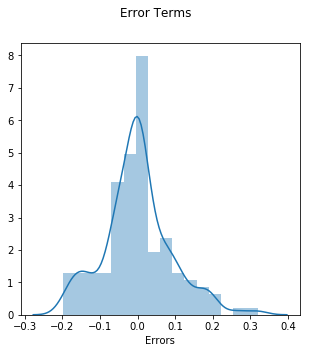

In [55]:
# Plotting histogram of the error terms
fig = plt.figure(figsize=(5,5))
sns.distplot((y_train - y_train_price))
fig.suptitle('Error Terms')
plt.xlabel('Errors')

As you can see the distribution is similar to normal distribution and the mean of the distribution is 0.

# We will make predictions on the training and test dataset now.

We first need to scale the test sets similar to what we did for the train sets.

In [56]:
#creating a list which will contain all the variables which are out of scale.
li = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
     'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

#performing fit_transform() on the columns present in the above list.
df_test[li] = scaler.transform(df_test[li])
df_test.head()

C:\Users\shara\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\shara\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,hardtop,hatchback,sedan,wagon,fwd,rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,#ofCylinder_five,#ofCylinder_four,#ofCylinder_six,#ofCylinder_three,#ofCylinder_twelve,#ofCylinder_two
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
161,0,0,1,0,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
187,0,0,1,0,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
60,0,0,0,0,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
166,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
141,0,0,0,0,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


Creating X_test and y_test.

In [57]:
y_test = df_test.pop('price')
X_test = df_test

Now lets make predictions on the test dataset using our lr_12 LR model.

In [58]:
# Creating X_test_new dataframe by dropping all the removed variables from X_train.
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\shara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
# Making predictions
y_pred = lr_12.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

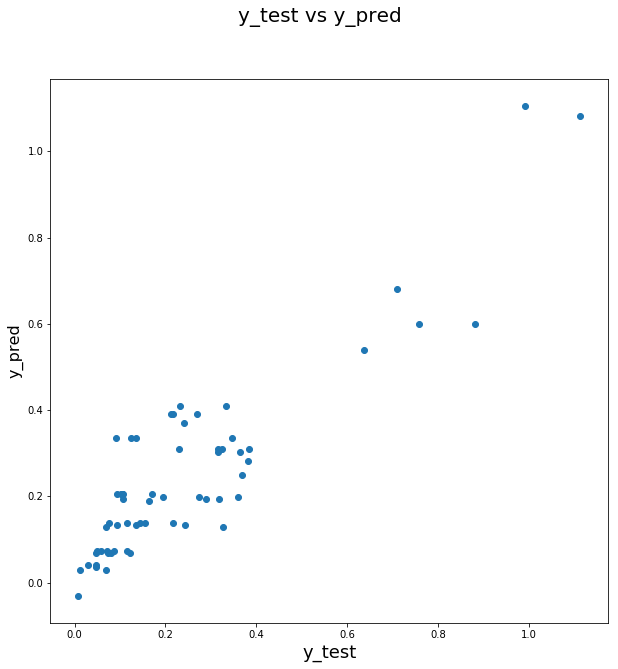

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Calculating R_squared score on the testset.

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.806654005872356

As the R_squared value on test set is 80%, it is a pretty good LinearRegression model and we can use this to predict the car price for Geely motors.

Therefore our model is 
𝑝𝑟𝑖𝑐𝑒= -0.1286 + 1.4493*enginesize - 0.1181*enginetype_ohcv - 0.3495*#ofCylinder_twelve + 0.2840*#ofCylinder_two